In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
"""
Imports
"""

import os
from dataclasses import dataclass

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import lightning as L
import lightning.pytorch as pl

torch.set_float32_matmul_precision('medium')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

# Check Data Module

In [4]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,)), 
])

In [5]:
train_ds = torchvision.datasets.MNIST(
    root='D:/mnist_reconstruction/data/train',
    train=True,
    download=True,
    transform=transform
)

train_ds

Dataset MNIST
    Number of datapoints: 60000
    Root location: D:/mnist_reconstruction/data/train
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [6]:
len(train_ds[0])

2

In [7]:
sample = train_ds[0][0]
sample.shape

torch.Size([1, 28, 28])

# Adding Noises

In [8]:
from skimage.util import random_noise

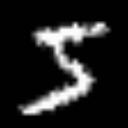

In [9]:
TF.resize(TF.to_pil_image(sample), [128, 128])

## Gaussian Noise

In [10]:
gauss_img = torch.tensor(
    random_noise(sample, mode='gaussian', mean=0, var=0.05, clip=True)
)

gauss_img.shape

torch.Size([1, 28, 28])

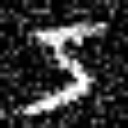

In [11]:
TF.resize(TF.to_pil_image(gauss_img), [128, 128])

## Salt & Pepper

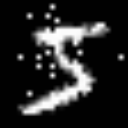

In [12]:
s_and_p = torch.tensor(
    random_noise(sample, mode='s&p', salt_vs_pepper=0.5, clip=True)
)

TF.resize(TF.to_pil_image(s_and_p), [128, 128])

## Speckle 

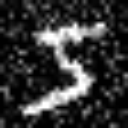

In [13]:
speckle_noise = torch.tensor(
    random_noise(sample, mode='speckle', mean=0, var=0.05, clip=True)
)

TF.resize(TF.to_pil_image(speckle_noise), [128, 128])

## Gaussian Blue

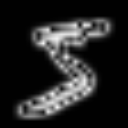

In [14]:
blurred_image = TF.gaussian_blur(sample, kernel_size=(3, 3), sigma=1.0)
TF.resize(TF.to_pil_image(blurred_image), [128, 128])

## RandomAdjustSharpness

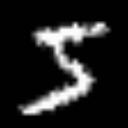

In [15]:
sharpness_transform = T.RandomAdjustSharpness(sharpness_factor=2.0)
transformed_image = sharpness_transform(sample)
TF.resize(TF.to_pil_image(transformed_image), [128, 128])

## Random Brightness

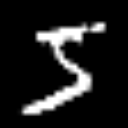

In [16]:
brightness_transform = T.ColorJitter(brightness=0.5)  
random_brightness_transform = T.RandomApply([brightness_transform], p=0.5)
transformed_image = random_brightness_transform(sample)
TF.resize(TF.to_pil_image(transformed_image), [128, 128])

# Final Transform

In [25]:
from noise_transform import noise_transform

In [36]:
print(f"Before - {sample.shape}")
noisy_sample = noise_transform(sample)
print(f"After - {noisy_sample.shape}")

Before - torch.Size([1, 28, 28])
After - torch.Size([1, 28, 28])


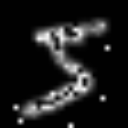

In [37]:
TF.resize(TF.to_pil_image(noisy_sample), [128, 128])